In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("../data/life_ladder_2005_2022_no1_gdp_sosupp.txt", delimiter=',')
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

In [3]:
df.describe()

,year,life_ladder,log_gdp_per_capita,social_support
count,2166.000000,2166.000000,2166.000000,2166.000000
mean,2014.156048,5.481281,9.385013,0.811091
std,4.708856,1.121787,1.151911,0.120215
min,2005.000000,2.179000,5.527000,0.290000
25%,2010.000000,4.642500,8.496000,0.747000
50%,2014.000000,5.433000,9.498000,0.836000
75%,2018.000000,6.309750,10.366500,0.905000
max,2022.000000,8.019000,11.664000,0.987000


In [4]:
df.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2007, 2020, 2022, 2006, 2005])

In [5]:
year_lst = list(np.sort(df.year.unique()))
year_lst

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [6]:
df.query('year == 2022').sort_values(by= 'life_ladder', ascending= False ).head(10)

,country_name,year,life_ladder,log_gdp_per_capita,social_support
630,Finland,2022,7.729,10.814,0.974
918,Israel,2022,7.662,10.692,0.954
515,Denmark,2022,7.545,10.994,0.970
823,Iceland,2022,7.449,10.935,0.985
1842,Sweden,2022,7.431,10.913,0.949
1384,Netherlands,2022,7.390,10.981,0.929
1473,Norway,2022,7.295,11.111,0.927
1157,Luxembourg,2022,7.228,11.660,0.878
455,Costa Rica,2022,7.077,9.998,0.902
1145,Lithuania,2022,7.038,10.602,0.937


In [7]:
top_10_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    top_10_over_years = pd.concat([top_10_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).head(5)],
                                  axis = 0)


#top_10_over_years   

In [8]:
top_10_over_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 499 to 1842
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        90 non-null     object 
 1   year                90 non-null     object 
 2   life_ladder         90 non-null     float64
 3   log_gdp_per_capita  90 non-null     float64
 4   social_support      90 non-null     float64
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [9]:
top_10_over_years.country_name.value_counts()

country_name
Denmark          17
Finland          12
Switzerland       9
Norway            9
Iceland           9
Netherlands       8
Canada            5
Sweden            5
Israel            5
Australia         2
New Zealand       2
Costa Rica        2
Austria           2
United States     1
Ireland           1
Venezuela         1
Name: count, dtype: int64

[Text(0, 0.5, 'Number of mentions in the top 5'), Text(0.5, 0, 'Country')]

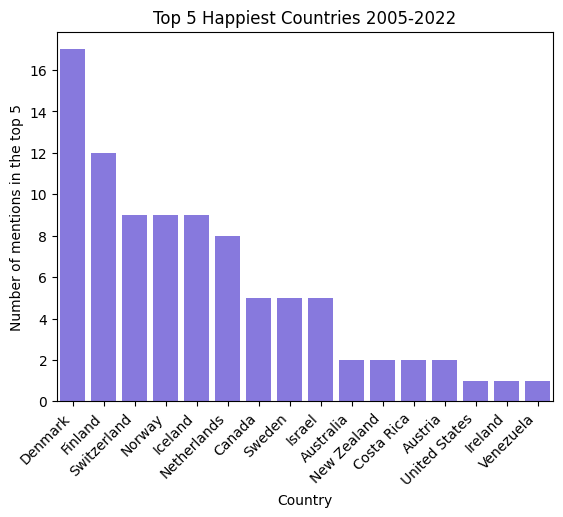

In [10]:
g=sns.countplot(data = top_10_over_years,
              x = 'country_name',
              order = top_10_over_years.country_name.value_counts().index,
              color = 'mediumslateblue')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title = 'Top 5 Happiest Countries 2005-2022')
g.set(ylabel= 'Number of mentions in the top 5', xlabel= 'Country')

In [11]:
plt.figure(figsize=(10,6))
g=sns.countplot(data = loosers_over_years,
              x = 'country_name',
              order = loosers_over_years.country_name.value_counts().index,
              color = 'mediumslateblue')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title = 'Bottom 5 Countries 2005-2022')
g.set(ylabel= 'Number of mentions in the bottom 5', xlabel= 'Country')

NameError: name 'loosers_over_years' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
loosers_over_years = pd.DataFrame(columns = df.columns)
for item in year_lst:
    my_query = 'year == ' + str(item)
    loosers_over_years = pd.concat([loosers_over_years,
                                  df.query(my_query).sort_values(by= 'life_ladder', ascending= False ).tail(5)],
                                  axis = 0)

   

[Text(0.5, 0, 'Number of Entries'), Text(0, 0.5, 'Country')]

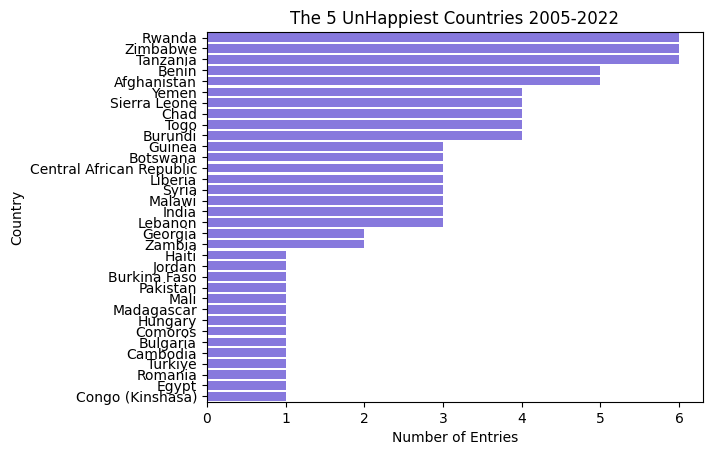

In [ ]:
g=sns.countplot(data = loosers_over_years,
              y = 'country_name',
              order = loosers_over_years.country_name.value_counts().index,
              color = 'mediumslateblue')
#g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
g.set(title = 'The 5 UnHappiest Countries 2005-2022')
g.set(xlabel= 'Number of Entries', ylabel= 'Country')

In [ ]:
max_happy_per_year = pd.DataFrame(df.life_ladder.groupby(df.year).max())

In [ ]:
max_happy_per_year.rename(columns= {0:'year', 1: 'max_life_ladder'})

,life_ladder
year,
2005,8.019
2006,7.672
2007,7.834
2008,7.971
2009,7.683
2010,7.771
2011,7.788
2012,7.776
2013,7.594


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Number of Countries')]

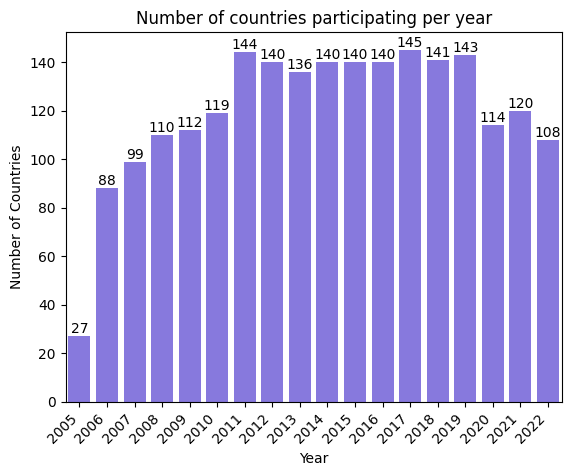

In [ ]:
g = sns.countplot(x = df.year, color = 'mediumslateblue')
for c in g.containers:
        g.bar_label(c, label_type='edge')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set(title= 'Number of countries participating per year')
g.set(xlabel= 'Year', ylabel= 'Number of Countries')

add a column with the class of life_ladder, bin from 1 to 8

In [ ]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support'],
      dtype='object')

In [ ]:
df.ladder_bin = df.life_ladder.astype(int)

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_9570/670890048.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ladder_bin = df.life_ladder.astype(int)


In [ ]:
df.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support
0,Afghanistan,2008,3.724,7.350,0.451
1,Afghanistan,2009,4.402,7.509,0.552
2,Afghanistan,2010,4.758,7.614,0.539
3,Afghanistan,2011,3.832,7.581,0.521
4,Afghanistan,2012,3.783,7.661,0.521


In [ ]:
df.ladder_bin.value_counts()

life_ladder
5    663
4    577
6    477
7    248
3    181
2     19
8      1
Name: count, dtype: int64

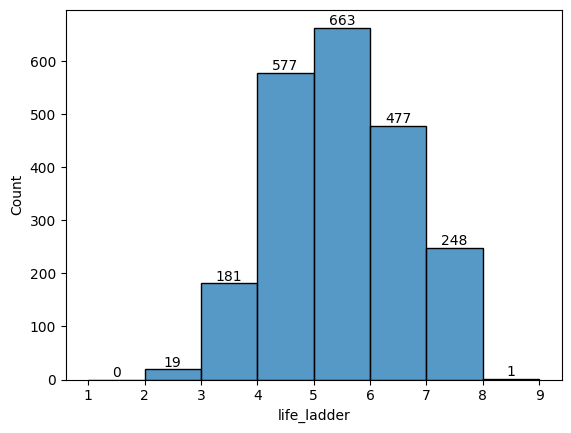

In [ ]:
custom_bins = np.arange(1,10,1)
h = sns.histplot(df.life_ladder, bins = custom_bins)
for c in h.containers:
        h.bar_label(c, label_type='edge')

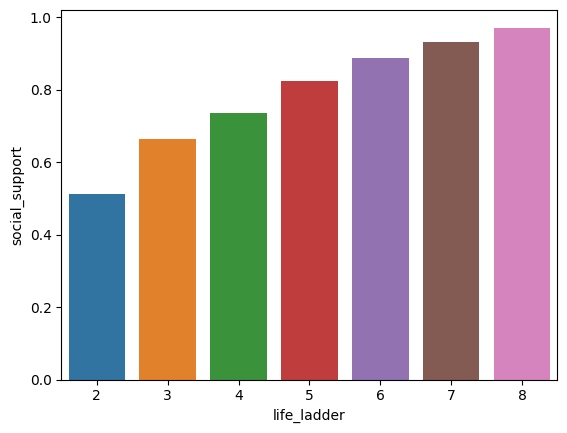

In [ ]:
sns.barplot(x = df.ladder_bin, 
            y = df.social_support,
            errorbar= None);

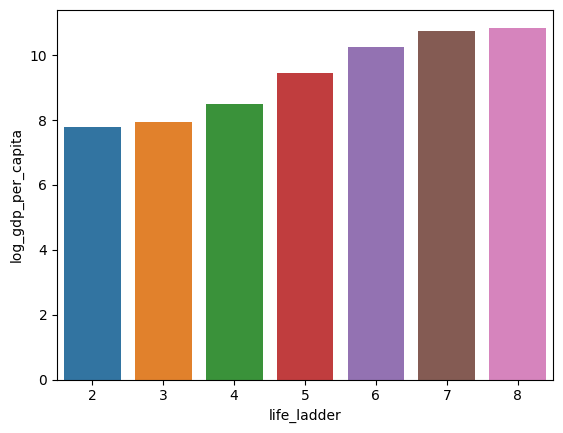

In [ ]:
sns.barplot(x = df.ladder_bin, y = df.log_gdp_per_capita, errorbar= None);

In [ ]:
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support'],
      dtype='object')

In [12]:
dict_ladder_bin = []
for m in range(2,9):
    dict_ladder_bin.append({'ladder_bin': m,
                            'log_gdp_per_capita': df.query(f'ladder_bin == {m}').log_gdp_per_capita.mean(),
                            'social_support': df.query(f'ladder_bin == {m}').social_support.mean()})
    
df_ladder_bin = pd.DataFrame(dict_ladder_bin)
df_ladder_bin

UndefinedVariableError: name 'ladder_bin' is not defined

<Axes: xlabel='log_gdp_per_capita', ylabel='ladder_bin'>

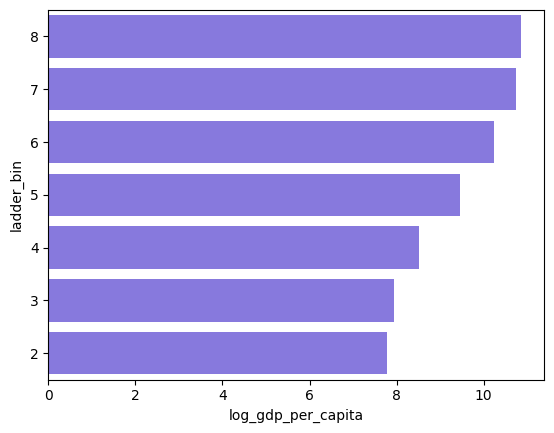

In [ ]:
sns.barplot(y = df_ladder_bin.ladder_bin,
            x = df_ladder_bin.log_gdp_per_capita,
            color = 'mediumslateblue',
            orient= 'h',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= False))

<Axes: xlabel='social_support', ylabel='ladder_bin'>

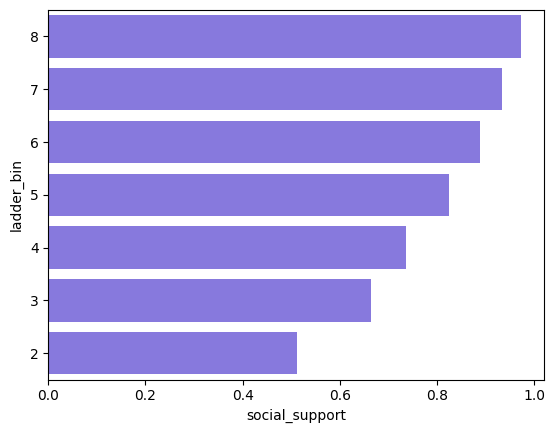

In [ ]:
sns.barplot(y = df_ladder_bin.ladder_bin,
            x = df_ladder_bin.social_support,
            color = 'mediumslateblue',
            orient= 'h',
            order= df_ladder_bin.ladder_bin.sort_values(ascending= False))

In [14]:
df.query('year == 2005').sort_values(by= 'life_ladder', ascending= False ).head(5)

,country_name,year,life_ladder,log_gdp_per_capita,social_support
499,Denmark,2005,8.019,10.849,0.972
1369,Netherlands,2005,7.464,10.809,0.947
324,Canada,2005,7.418,10.707,0.962
1826,Sweden,2005,7.376,10.724,0.951
74,Australia,2005,7.341,10.662,0.968


In [13]:
year_lst

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

NameError: name 'year_lst_lst' is not defined

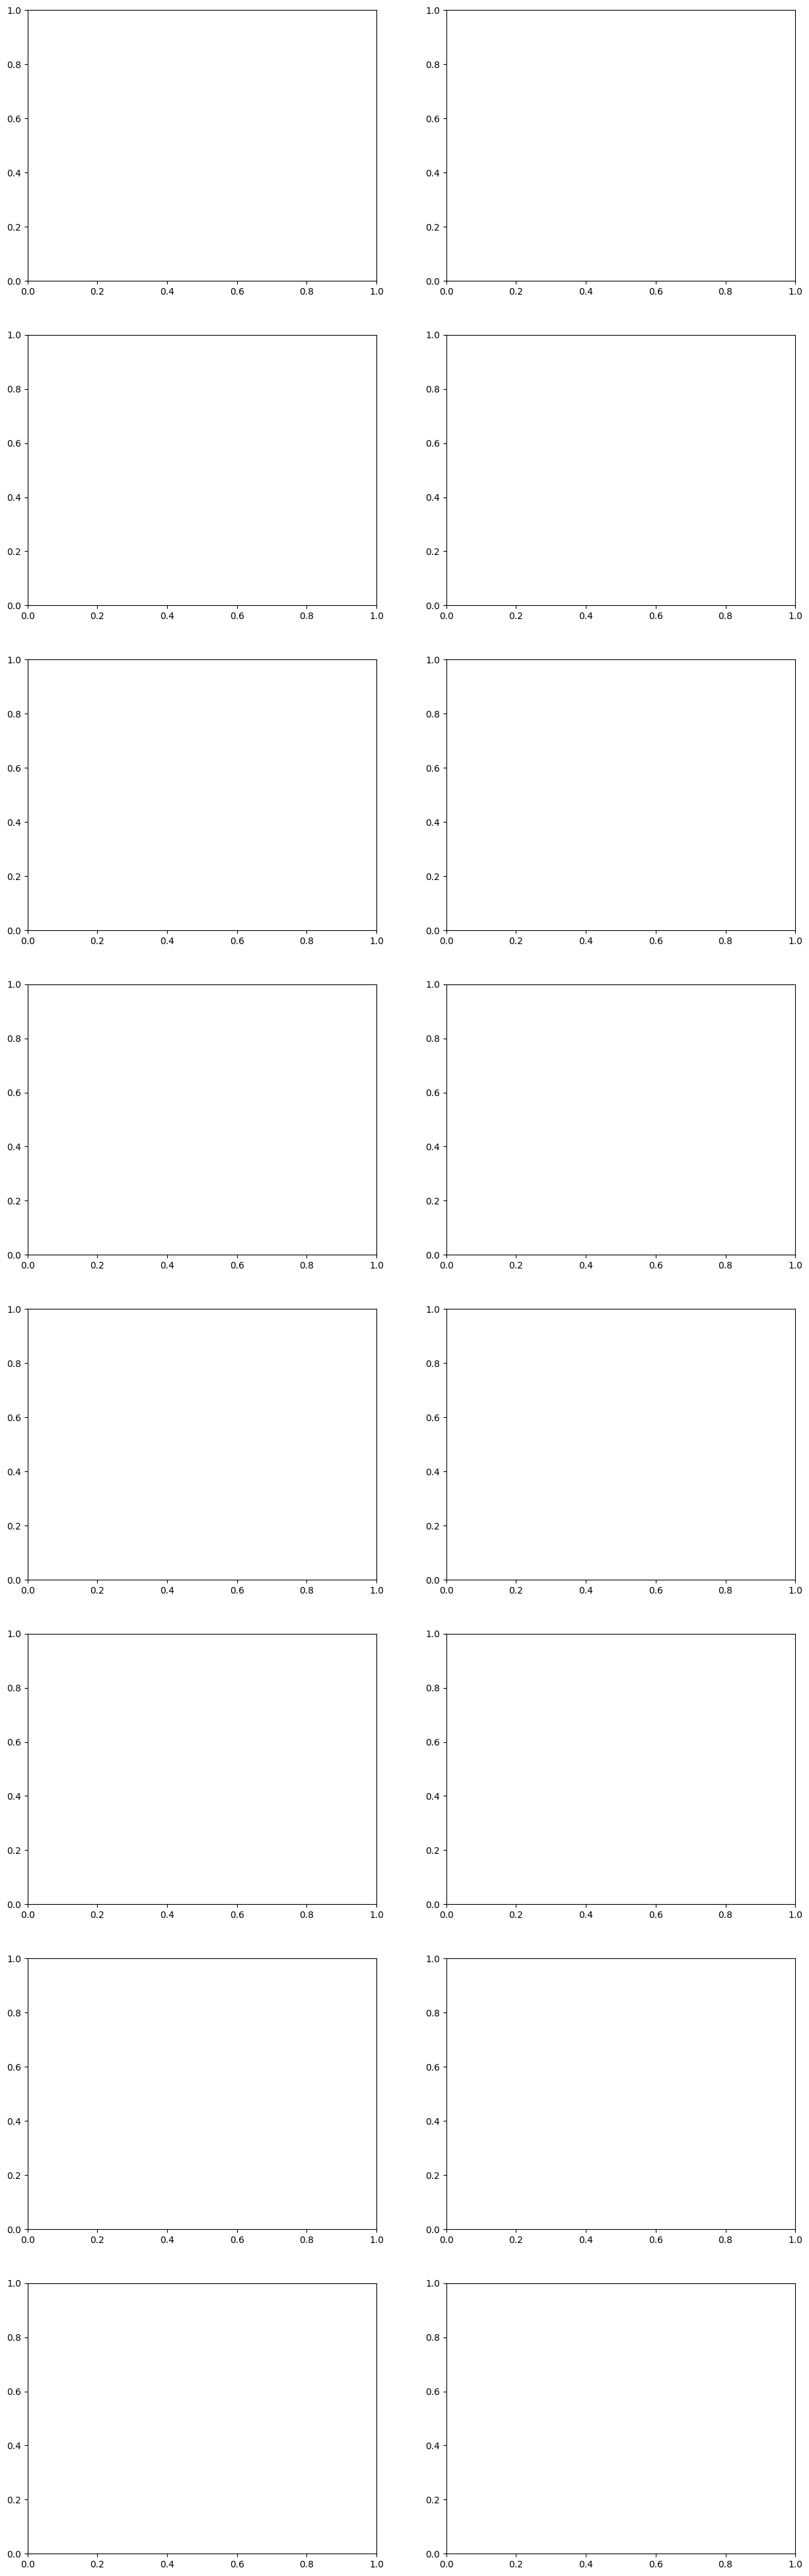

In [15]:
fig,axes = plt.subplots(8,2, figsize =(15,50))
count = 0
for item in year_lst_lst:
    g=sns.barplot(data = df.query('year == @item').sort_values(by= 'life_ladder', ascending= False ).head(5),
                 x = 'country_name', y = 'life_lader', 
                 ax=axes[int(count/3)][count%3], color='steelblue')
    g.set(title=item, xlabel='')
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
    count += 1